In [ ]:
# ANA TEMA : Erişilebilir ve Temiz Enerji
# Data Seti: Electric_Vehicle_Population_Data

In [9]:
import pandas as pd 
df = pd.read_csv('../data/Electric_Vehicle_Population_Data.csv')
pd.set_option('display.max_columns', None) #Tüm colonları göster
pd.set_option('display.max_rows', None)    #Tüm satırları göster

print(df.head())

   VIN (1-10)     County      City State  Postal Code  Model Year       Make       Model                   Electric Vehicle Type Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  Base MSRP  Legislative District  DOL Vehicle ID             Vehicle Location        Electric Utility  2020 Census Tract
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)           Clean Alternative Fuel Vehicle Eligible              42          0                   NaN       198968248    POINT (-81.80023 24.5545)                     NaN        12087972100
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)           Clean Alternative Fuel Vehicle Eligible              38          0                   NaN         5204412  POINT (-114.57245 35.16815)                     NaN        32003005702
2  JN1AZ0CP8B     Yakima    Yakima    WA        9890

In [10]:
df = df[['Model Year', 'Make', 'Model','Electric Vehicle Type', 'Electric Range']]
df.head(20).style.hide(axis='index')

Model Year,Make,Model,Electric Vehicle Type,Electric Range
2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),42
2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),38
2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),73
2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),238
2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),26
2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),215
2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75
2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75
2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),84
2016,KIA,SOUL,Battery Electric Vehicle (BEV),93


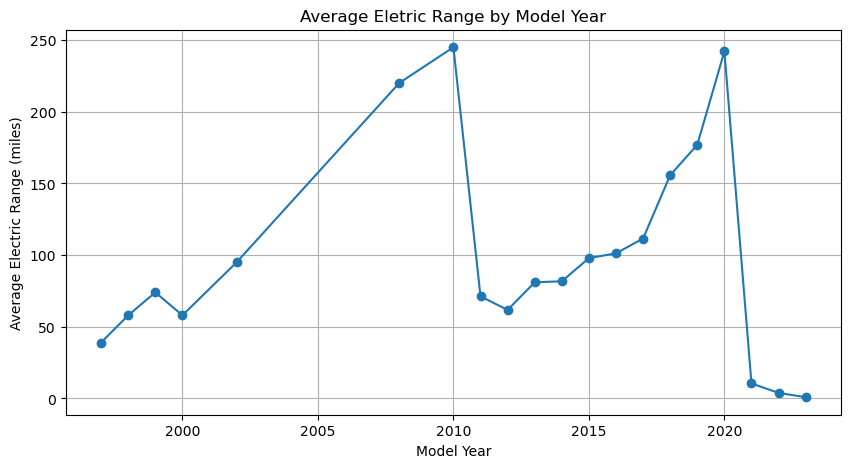

In [11]:
# YILLARA GÖRE ELEKTRİK MENZİL GRAFİĞİ
import matplotlib.pyplot as plt

#Yıllara göre ortalama menzil hesaplama
year_range = df.groupby('Model Year')['Electric Range'].mean() #mean ile ortalama aldık

#Line Charts(Çizgi Grafiği)
plt.figure(figsize=(10,5)) #Grafik boyutunu ayarladık
plt.plot(year_range.index, year_range.values, marker='o') # index = yıllar, values = ortalama menzil (marker ile noktaları işaretledik)
plt.xlabel('Model Year') #x ekseni etiketi
plt.ylabel('Average Electric Range (miles)') #y ekseni etiketi
plt.title("Average Eletric Range by Model Year") #Grafik başlığı
plt.grid(True) #ızgara ekleme
plt.show()

#Bu grafik, bize şunu gösteriyor :
    #Elektrikli araçların menzili yıllara göre nasıl artmış ?
    #Hangi yıllarda teknolojik sıçrama yaşanmış?
    #PHEV -> BEV geçiş dönemleri nasıl değişmiş?

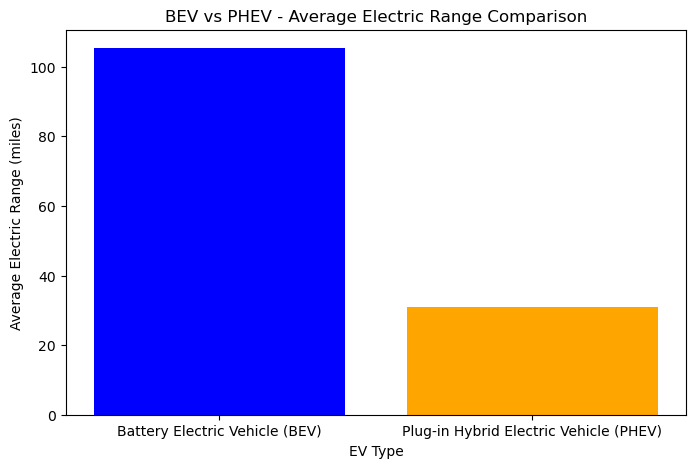

In [12]:
# BEV vs PHEV Menzil Karşılaştırma Grafiği
range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].mean()

plt.figure(figsize=(8,5))
plt.bar(range_by_type.index, range_by_type.values, color=['blue', 'orange'])
plt.xlabel('EV Type')
plt.ylabel('Average Electric Range (miles)')
plt.title('BEV vs PHEV - Average Electric Range Comparison')
plt.show()

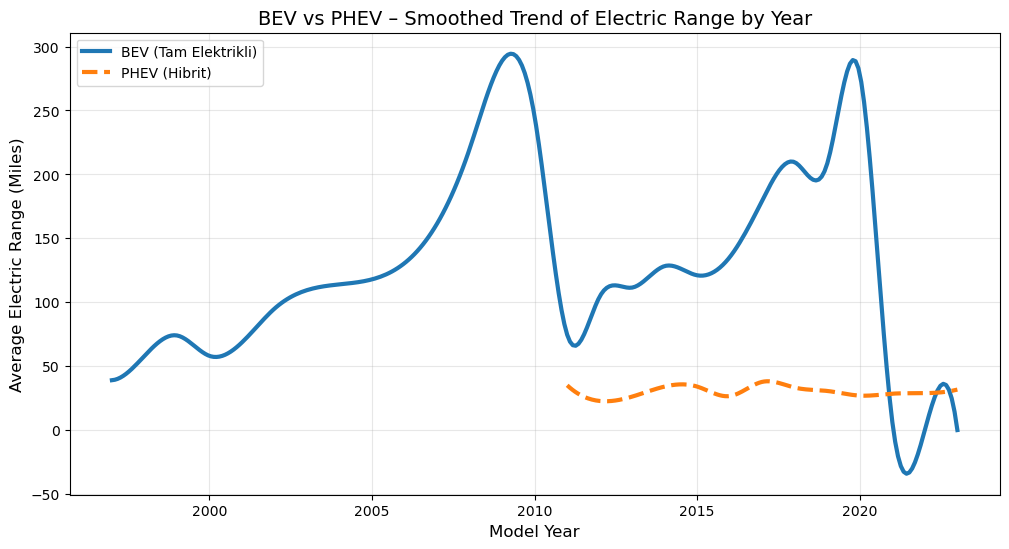

In [ ]:
# YILA GÖRE BEV vs PHEV karşılaştırma Line Chart
import numpy as np
from scipy.interpolate import make_interp_spline

bev = df[df['Electric Vehicle Type'].str.contains("BEV")] #BEV araçları filtreledik
phev = df[df['Electric Vehicle Type'].str.contains("PHEV")] #PHEV araçları filtreledik

#BEV araçları için yıllara göre ortalama menzil hesaplaması 
bev_year = bev.groupby('Model Year')['Electric Range'].mean()

#PHEV araçları için yıllara göre ortalama menzil hesaplaması
phev_year = phev.groupby('Model Year')['Electric Range'].mean()

# X(yıl) ve Y(ortalama menzil) değerlerini array formatına çeviriyoruz
x_bev = bev_year.index.values
y_bev = bev_year.values

x_phev = phev_year.index.values
y_phev = phev_year.values


x_bev_smooth = np.linspace(x_bev.min(), x_bev.max(), 300)
y_bev_smooth = make_interp_spline(x_bev, y_bev)(x_bev_smooth)

x_phev_smooth = np.linspace(x_phev.min(), x_phev.max(), 300)
y_phev_smooth = make_interp_spline(x_phev, y_phev)(x_phev_smooth)


plt.figure(figsize=(12,6))
# BEV çizgisi (yumuşatılmış)
plt.plot(x_bev_smooth, y_bev_smooth, label="BEV (Tam Elektrikli)", linewidth=3)

# PHEV çizgisi (yumuşatılmış)
plt.plot(x_phev_smooth, y_phev_smooth, label="PHEV (Hibrit)", linewidth=3, linestyle='--')

plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Average Electric Range (Miles)", fontsize=12)


plt.title("BEV vs PHEV – Smoothed Trend of Electric Range by Year", fontsize=14)

# Grid + Legend
plt.grid(alpha=0.3)
plt.legend()

plt.show()

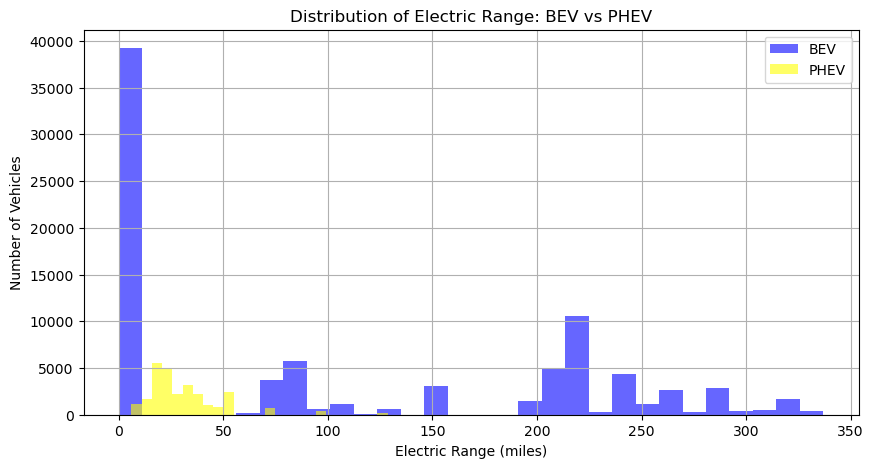

In [14]:
#Histogram Electric Range Distribution(BEV + PHEV)
#AMAÇ: Elektrikli araçların menzilinin(Electric Range) nasıl  dağıldığını görmek
bev_range = bev['Electric Range']
phev_range = phev['Electric Range']

plt.figure(figsize=(10,5))

#alpha: saydamlık ayarı
#bins: kaç adet sütun olacağını belirler

plt.hist(bev_range, bins=30, alpha=0.6, label='BEV', color='blue')
plt.hist(phev_range, bins=30, alpha=0.6, label='PHEV', color='yellow')

plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Electric Range: BEV vs PHEV')
plt.legend() #Etiket kutusu
plt.grid(True)
plt.show()